In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import seaborn as sns
from umap import UMAP

In [2]:
data = pd.read_csv('cleantraining.csv')
UnrankedGames = pd.read_csv('cleantesting.csv')
UnrankedGames =UnrankedGames.reindex(columns=data.columns)
UnrankedX = UnrankedGames.drop(['id','bayesaverage','name','descriptions','mechanics','categories'], axis=1)
X=data.drop(['id','bayesaverage','name','descriptions','mechanics','categories'], axis=1)

In [3]:
Gamesclustering = pd.concat([X,UnrankedX])

In [4]:
ScaledGames = StandardScaler().fit_transform(Gamesclustering)

In [6]:
kmeans_per_k = [KMeans(n_clusters=k, n_init='auto', random_state=1324).fit(ScaledGames)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

c:\Users\caleb\anaconda3\envs\stat386\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\caleb\anaconda3\envs\stat386\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\caleb\anaconda3\envs\stat386\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\Users\caleb\anaconda3\envs\stat386\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarn

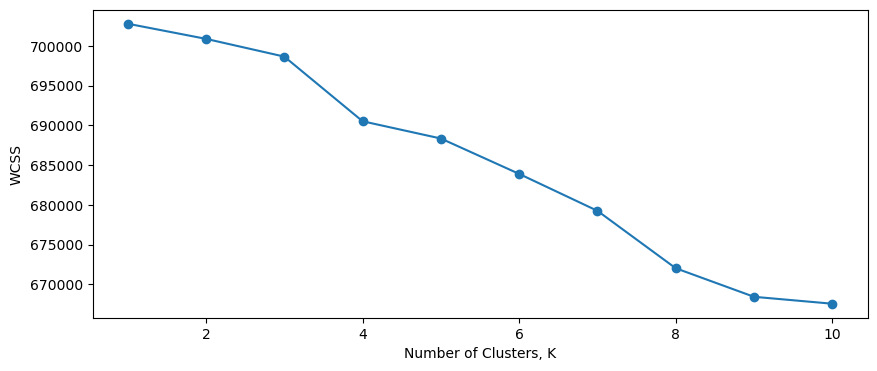

In [7]:
plt.figure(figsize=(10,4))
plt.plot(np.arange(len(inertias))+1,inertias,marker="o")
plt.xlabel('Number of Clusters, K')
plt.ylabel('WCSS');

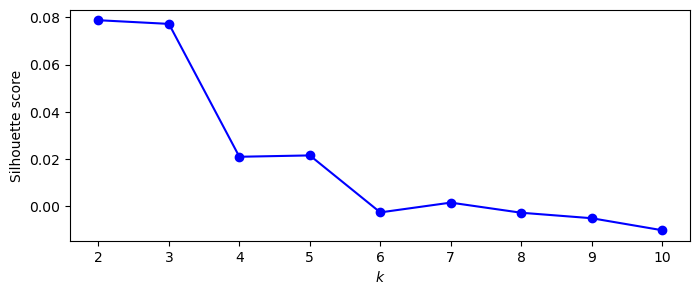

In [8]:
silhouette_scores = [silhouette_score(ScaledGames, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.show()

In [9]:
gmm = GaussianMixture(n_components=3, random_state=1564)
clustersgmm = gmm.fit_predict(ScaledGames)

c:\Users\caleb\anaconda3\envs\stat386\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


According to the Shap analysis, Complexity, Year Published, Humor, specialChar, and Variable Set-up are the most important features, so I will visualize the clusters using these features

In [49]:
GamesUse = Gamesclustering[['complexity','yearpublished','Humor','specialChar','Variable Set-up']]
GamesUse['Cluster']=clustersgmm

C:\Users\caleb\AppData\Local\Temp\ipykernel_14548\4288219492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GamesUse['Cluster']=clustersgmm


c:\Users\caleb\anaconda3\envs\stat386\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\caleb\anaconda3\envs\stat386\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\caleb\anaconda3\envs\stat386\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\caleb\anaconda3\envs\stat386\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

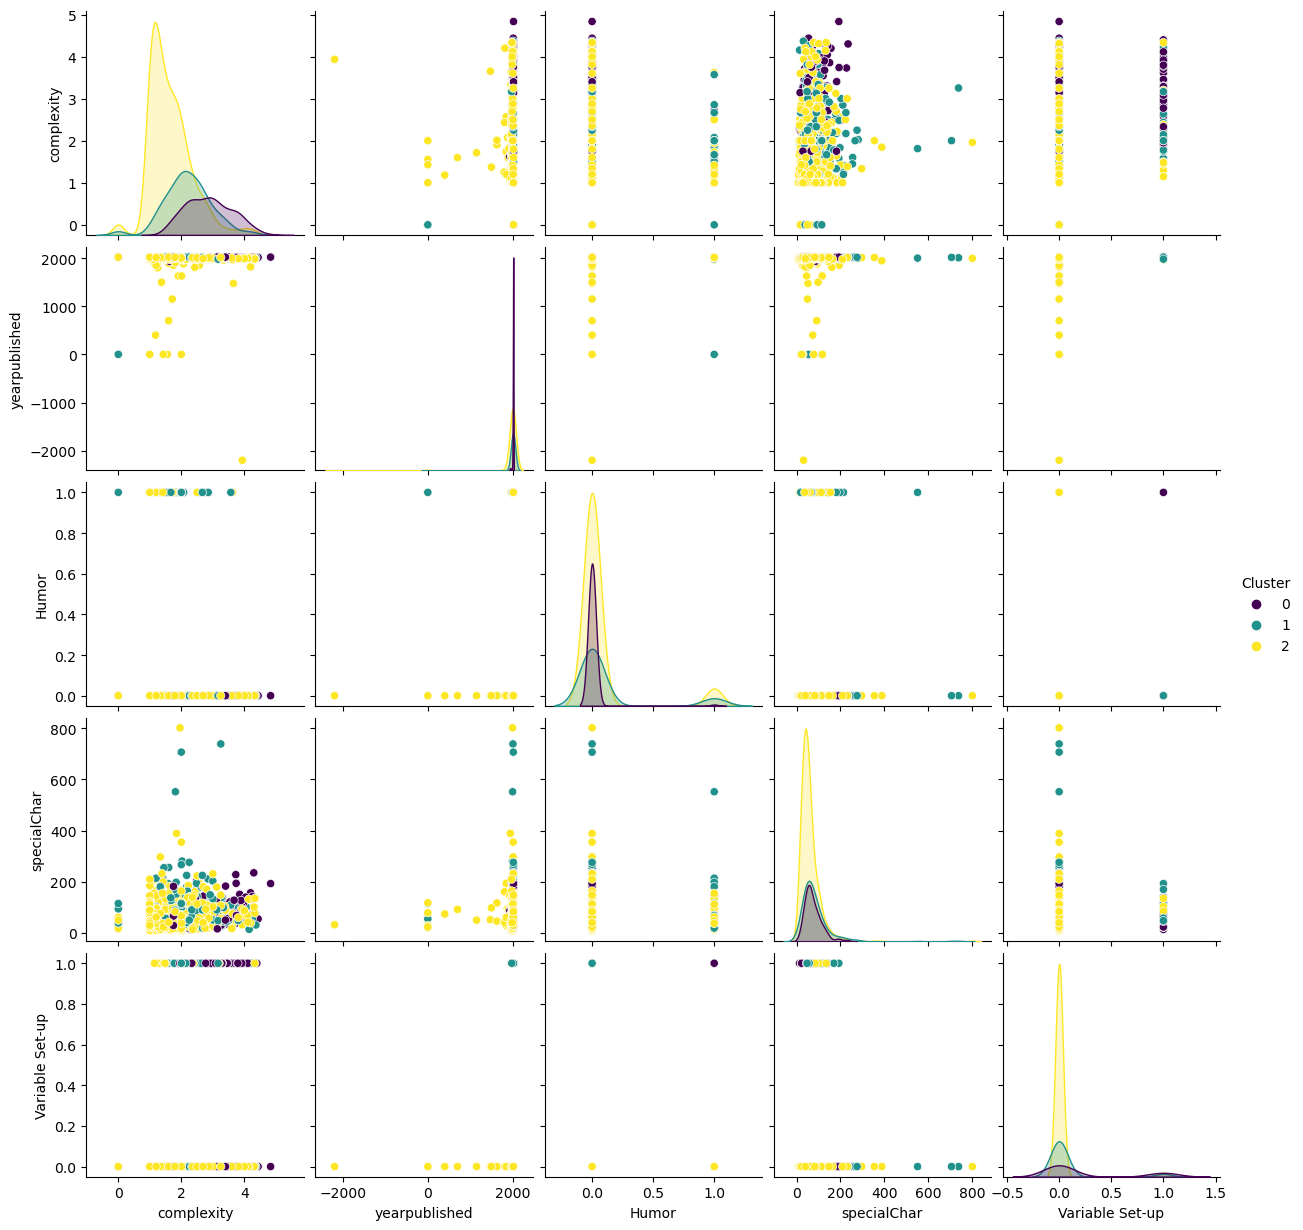

In [50]:
sns.pairplot(GamesUse, diag_kind='kde', markers='o', hue='Cluster', palette='viridis')

In [53]:
GamesRaw = pd.concat([data,UnrankedGames])

In [56]:
GamesRaw['Cluster']=clustersgmm

In [62]:
GamesRaw.groupby('Cluster').count()

,id,name,yearpublished,bayesaverage,descriptions,minplayers,maxplayers,minplaytime,maxplaytime,mechanics,...,whether,whoever,win,winner,winning,wins,without,work,world,worth
Cluster,,,,,,,,,,,,,,,,,,,,,
0,216,216,216,216,216,216,216,216,216,216,...,216,216,216,216,216,216,216,216,216,216
1,305,305,305,305,305,305,305,305,305,305,...,305,305,305,305,305,305,305,305,305,305
2,743,743,743,743,743,743,743,743,743,743,...,743,743,743,743,743,743,743,743,743,743


In [60]:
GamesRaw.groupby('Cluster').mean('complexity')

,id,yearpublished,bayesaverage,minplayers,maxplayers,minplaytime,maxplaytime,minage,avgplaytime,complexity,...,whether,whoever,win,winner,winning,wins,without,work,world,worth
Cluster,,,,,,,,,,,,,,,,,,,,,
0,146492.263889,2012.287037,7.135899,1.745370,4.476852,60.754630,138.472222,11.712963,138.472222,2.871490,...,0.005892,0.012559,0.019085,0.019895,0.006293,0.023841,0.007929,0.024645,0.038973,0.015248
1,146536.291803,1998.380328,6.390912,1.977049,5.609836,53.977049,79.108197,11.537705,79.108197,2.213277,...,0.015528,0.002835,0.035539,0.011601,0.012457,0.013739,0.011573,0.023428,0.053257,0.003248
2,108253.452221,1967.693136,5.927111,2.069987,7.508748,42.714670,53.302826,8.915209,53.302826,1.641641,...,0.006594,0.017805,0.027447,0.016580,0.010448,0.037649,0.011505,0.007929,0.018220,0.012032


Looking at the raw data, I assume the clusters are Heavy games (0), Light games (1), and Party/Family games (2)

In [ ]:
UnrankedClustered = GamesRaw.tail(500) #Only the games I consider 'Unranked'

In [68]:
UnrankedClustered.groupby('Cluster').count()

,id,name,yearpublished,bayesaverage,descriptions,minplayers,maxplayers,minplaytime,maxplaytime,mechanics,...,whether,whoever,win,winner,winning,wins,without,work,world,worth
Cluster,,,,,,,,,,,,,,,,,,,,,
0,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
2,392,392,392,392,392,392,392,392,392,392,...,392,392,392,392,392,392,392,392,392,392


In [82]:
UnrankedClustered.groupby('Cluster').mean('complexity')

,id,yearpublished,bayesaverage,minplayers,maxplayers,minplaytime,maxplaytime,minage,avgplaytime,complexity,...,whether,whoever,win,winner,winning,wins,without,work,world,worth
Cluster,,,,,,,,,,,,,,,,,,,,,
0,334600.000000,2022.214286,5.569798,1.500000,4.357143,70.714286,769.642857,12.071429,769.642857,2.982650,...,0.010888,0.006897,0.015464,0.000000,0.000000,0.025590,0.005136,0.017132,0.035483,0.015270
1,221536.074468,1972.031915,5.531272,1.968085,5.308511,49.744681,74.744681,11.202128,74.744681,2.003204,...,0.019151,0.001451,0.036151,0.011507,0.008284,0.013880,0.007582,0.020706,0.051303,0.003865
2,127664.647959,1963.790816,5.515836,2.079082,7.716837,51.553571,65.681122,8.785714,65.681122,1.686718,...,0.007155,0.015223,0.031574,0.016106,0.007284,0.036224,0.009290,0.008025,0.019452,0.011322


In [80]:
UnrankedClustered.groupby('Cluster').median('complexity')

,id,yearpublished,bayesaverage,minplayers,maxplayers,minplaytime,maxplaytime,minage,avgplaytime,complexity,...,whether,whoever,win,winner,winning,wins,without,work,world,worth
Cluster,,,,,,,,,,,,,,,,,,,,,
0,354831.5,2023.0,5.574145,1.5,4.0,60.0,105.0,12.5,105.0,2.9286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,233732.5,2018.0,5.524545,2.0,5.0,30.0,60.0,12.0,60.0,2.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103578.5,2010.5,5.513300,2.0,4.0,30.0,30.0,9.0,30.0,1.5000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
RankedClustered = GamesRaw.head(764)

In [79]:
RankedClustered.groupby('Cluster').count()

,id,name,yearpublished,bayesaverage,descriptions,minplayers,maxplayers,minplaytime,maxplaytime,mechanics,...,whether,whoever,win,winner,winning,wins,without,work,world,worth
Cluster,,,,,,,,,,,,,,,,,,,,,
0,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,202,202,202,202,202
1,211,211,211,211,211,211,211,211,211,211,...,211,211,211,211,211,211,211,211,211,211
2,351,351,351,351,351,351,351,351,351,351,...,351,351,351,351,351,351,351,351,351,351


In [83]:
RankedClustered.groupby('Cluster').mean('complexity')

,id,yearpublished,bayesaverage,minplayers,maxplayers,minplaytime,maxplaytime,minage,avgplaytime,complexity,...,whether,whoever,win,winner,winning,wins,without,work,world,worth
Cluster,,,,,,,,,,,,,,,,,,,,,
0,133455.094059,2011.599010,7.244440,1.762376,4.485149,60.064356,94.727723,11.688119,94.727723,2.863786,...,0.005546,0.012952,0.019336,0.021274,0.006729,0.023720,0.008123,0.025166,0.039215,0.015247
1,113124.066351,2010.118483,6.773879,1.981043,5.744076,55.862559,81.052133,11.687204,81.052133,2.306864,...,0.013914,0.003451,0.035267,0.011643,0.014316,0.013676,0.013351,0.024640,0.054127,0.002974
2,86574.851852,1972.051282,6.386427,2.059829,7.276353,32.843305,39.478632,9.059829,39.478632,1.591297,...,0.005967,0.020688,0.022838,0.017108,0.013982,0.039241,0.013979,0.007821,0.016843,0.012825


In [81]:
RankedClustered.groupby('Cluster').median('complexity')

,id,yearpublished,bayesaverage,minplayers,maxplayers,minplaytime,maxplaytime,minage,avgplaytime,complexity,...,whether,whoever,win,winner,winning,wins,without,work,world,worth
Cluster,,,,,,,,,,,,,,,,,,,,,
0,135368.0,2013.0,7.26206,2.0,4.0,60.0,90.0,12.0,90.0,2.8486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,115746.0,2012.0,6.80582,2.0,5.0,45.0,60.0,12.0,60.0,2.2449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30869.0,2007.0,6.40767,2.0,5.0,30.0,30.0,8.0,30.0,1.4890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
for name in RankedClustered[RankedClustered['Cluster']==0]['name']:
    print(name)

Brass: Birmingham
Ark Nova
Twilight Imperium: Fourth Edition
Dune: Imperium
Terraforming Mars
Star Wars: Rebellion
Gaia Project
Twilight Struggle
Through the Ages: A New Story of Civilization
Great Western Trail
The Castles of Burgundy
Scythe
7 Wonders Duel
Brass: Lancashire
A Feast for Odin
Concordia
Lost Ruins of Arnak
Wingspan
Terra Mystica
Root
Orléans
Barrage
Everdell
Viticulture Essential Edition
Food Chain Magnate
Pax Pamir: Second Edition
Underwater Cities
Puerto Rico
Cascadia
Caverna: The Cave Farmers
Anachrony
Agricola
Tzolk'in: The Mayan Calendar
Power Grid
Grand Austria Hotel
Maracaibo
The Quacks of Quedlinburg
Clans of Caledonia
Le Havre
Paladins of the West Kingdom
The Gallerist
Agricola (Revised Edition)
Race for the Galaxy
Five Tribes: The Djinns of Naqala
Eclipse: New Dawn for the Galaxy
Teotihuacan: City of Gods
Lords of Waterdeep
Beyond the Sun
Through the Ages: A Story of Civilization
El Grande
Dominant Species
7 Wonders
The Voyages of Marco Polo
Inis
Architects of 

In [95]:
for name in RankedClustered[RankedClustered['Cluster']==1]['name']:
    print(name)

Pandemic Legacy: Season 1
Gloomhaven
War of the Ring: Second Edition
Gloomhaven: Jaws of the Lion
Spirit Island
Nemesis
Arkham Horror: The Card Game
Mage Knight Board Game
The Crew: Mission Deep Sea
Marvel Champions: The Card Game
Blood Rage
Pandemic Legacy: Season 2
Mansions of Madness: Second Edition
Star Wars: Imperial Assault
Android: Netrunner
Mechs vs. Minions
Clank!: A Deck-Building Adventure
Aeon's End
Robinson Crusoe: Adventures on the Cursed Island
The Search for Planet X
Battlestar Galactica: The Board Game
Dominion: Intrigue
Eldritch Horror
The Quest for El Dorado
The 7th Continent
Dominion
Clank! In! Space!: A Deck-Building Adventure
Champions of Midgard
Pandemic
Star Realms
Watergate
Magic: The Gathering
Kemet
Sherlock Holmes Consulting Detective: The Thames Murders & Other Cases
The Lord of the Rings: The Card Game
Legendary Encounters: An Alien Deck Building Game
Star Wars: X-Wing Miniatures Game
Chaos in the Old World
Star Wars: Outer Rim
Memoir '44
Descent: Journeys i

In [94]:
for name in RankedClustered[RankedClustered['Cluster']==2]['name']:
    print(name)

Heat: Pedal to the Metal
Crokinole
The Crew: The Quest for Planet Nine
Azul
Decrypto
SCOUT
Codenames
Just One
Cartographers
Undaunted: Normandy
Ticket to Ride: Europe
That's Pretty Clever!
Welcome To...
Azul: Summer Pavilion
Space Base
Ticket to Ride: Nordic Countries
Go
Carcassonne
Tichu
My City
Ticket to Ride
Calico
KLASK
Codenames: Duet
Fantasy Realms
Camel Up (Second Edition)
Hanamikoji
Sushi Go Party!
Flamme Rouge
Samurai
Santorini
Kingdomino
Battle Line
Hive
Cryptid
Ethnos
Dixit: Odyssey
Skull King
Telestrations
Onitama
Dungeon Petz
Lost Cities
For Sale
Love Letter
Survive: Escape from Atlantis!
Love Letter
Tikal
Sea Salt & Paper
Exit: The Game – The Abandoned Cabin
Project L
Arboretum
Bärenpark
Dixit
Schotten Totten
Twice as Clever!
Downforce
Ticket to Ride: Märklin
Dice Forge
Skull
Azul: Stained Glass of Sintra
Cubitos
Chess
Codenames: Pictures
Wavelength
Sprawlopolis
PitchCar
Colt Express
No Thanks!
Point Salad
Bohnanza
High Society
Canvas
Hanabi
Potion Explosion
Railroad Ink:

Looking through the names of the games in the clusters (Only the 'mainstream' games since those are the ones I know), I think my initial assessment on the clusters is correct

In [99]:
for name in UnrankedClustered[RankedClustered['Cluster']==0]['name']:
    print(name)

Auf der Walz
Rhett & Link's We're Still Good Game
Imperial Tide: The Great War 1914-1918
Geared: Build Your Bike
Rescue Polar Bears
Castle Dash
Giftbringer
Sssnake: Flip&Write
Star Wars: Rescue on Geonosis
Pigasus
Wild Gardens
Book of Dragons
The Prestel New York Architecture Game
CLUE: Dungeons & Dragons
The Great Patriotic War: Nazi Germany vs. the Soviet Union
CubiCup
Mine, All Mine!
O Jogo da Enciclopédia
Tough Calls: Dystopia
Detective Rummy
Prince of Chaos: Battle for Tae Orn
I Spy Memory Game
The Secret Flower
Science Ninjas: Valence
Garbage
Summit
Farsight
Electro
Gigi Gnomo
Odd Shop
Widower's Wood: An Iron Kingdoms Adventure Board Game
Paul Koenig's Market Garden: Nijmegen Bridge
Snarf Quest
Brexit: The Real Deal
Doktor Igel
Nieuport 1600
Kingdom Hearts TCG
Deluxe Camping
Mighty Warriors
Kreta 1941
Numbers Up
The Longest Trench
Agricola Express
Ultimate Werewolf: Extreme
The War of the Worlds: England
Owly Tribe
Kookaburra Game
Urban Panic
MOD X
Irány a Kincses Sziget!
Jeopard

C:\Users\caleb\AppData\Local\Temp\ipykernel_14548\2540327632.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for name in UnrankedClustered[RankedClustered['Cluster']==0]['name']:


In [98]:
for name in UnrankedClustered[RankedClustered['Cluster']==1]['name']:
    print(name)

Yummy Yummy Pancake
Clusterfight!
Leuthen: Frederick's Greatest Victory
Zombie Life
Perplexus Rookie
Quits
Wild Kratts Race Around the World
Puerto Diablo
Legions of Steel
Yōkai Quest
Noggin
Mission Control: Critical Orbit
The Baton Races of Yaz
Redcliff Bay Mysteries
Battle Spirits: Trading Card Game
How to Host a Murder: The Watersdown Affair
Wonky: The Unstable Adult Party Game
Button Soccer
Warhammer 40,000: First Strike
Turtle Splash!
Trainsport: Switzerland
Ruweisat Ridge: The First Battle of El Alamein
Googly Eyes
Pipeline: The Oil Game
Dragon Whisperer
Luftschiff
Reverse Charades Junior Edition
Rainbow 35
Teraforming
DUOS
Dragon's Cave
Veleno
Bank Heist
Witchcraft: Moonlight Magic
Borodino '41
Terra Pyramides
Moeraki: Kemu
Pyramid: Home Game
Nichtlustig: Noch mehr Labor Chaos
Backwoods
Annihilator / OneWorld
Baronda
The Last Starfighter Combat Game
Free at Last
Tower Up
Cookie Fu
Bloody 110
Tahiti:  Clan Warfare, Polynesia 750 AD
Forgotten Axis: The Romanian Campaign
Super Race

C:\Users\caleb\AppData\Local\Temp\ipykernel_14548\2912751933.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for name in UnrankedClustered[RankedClustered['Cluster']==1]['name']:


In [97]:
for name in UnrankedClustered[RankedClustered['Cluster']==2]['name']:
    print(name)

Magic: The Gathering – Duel Decks: Elspeth vs. Kiora
Tatort Meer Fall 1: Die Vogelinsel
Gates of Mara
Lino
Hepta
Petri Dish
Vira
Code Breaker
Search & Destroy: Tactical Combat Vietnam – 1965-1966
Schweine-Würfeln
Rum Rebellion
Counting Zzzzs
Keops
Crusoe's Planet
Die Schule der magischen Tiere: Nicht zu fassen!
Scurvy Dice
KIPP X
Ogre Miniatures
Slasher: The Final Cut
Too Many Cooks
Absolute Victory: World Conflict 1939-1945
Bamboozle
Final War
Austin Powers CCG
Waterloo: The Last Great Battle
Götterdämmerung
Paul Koenig's The Bulge: 6th Panzer Army
Empires at War
NFL Game Day
Get Reelz
Hexx & Hopp
Bonaparte in the Quadrilateral
VerTIPPT nochmal!
Speed
Hollywood Game Night Party Game
Drawing Dead
Deterrence 2X62
En tu casa o donde sea
Hunters of the Lost Creatures
Legend Academy
Point Blank: V is for Victory
1806: Rossbach Avenged
Something Wild! Marvel Infinity Saga: Iron Man
Secret Night at Davis Manor
OTLO Stones
MooT
Raiders of the Lost Tomb
Veletas
Swoggle
In A Bind Jr
Deadly Prem

C:\Users\caleb\AppData\Local\Temp\ipykernel_14548\1231085009.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for name in UnrankedClustered[RankedClustered['Cluster']==2]['name']:


I don't recognize these games, but I trust they are grouped correctly

#### Dimension Reduction for visualization

In [ ]:
ScaledGames['Cluster']=clustersgmm

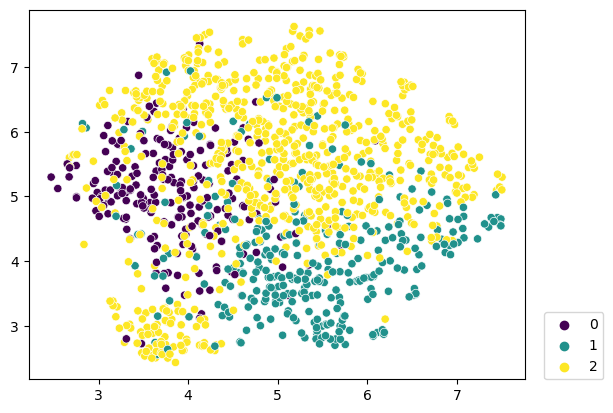

In [12]:
umap = UMAP(n_neighbors=50)
um = umap.fit_transform(ScaledGames)
sns.scatterplot(x=um[:,0], y=um[:,1], hue =clustersgmm,  palette='viridis')
plt.legend(loc=(1.04,0));